In [1]:
import h5py
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pyfftw as ft
import time
import pyJHTDB
from pyJHTDB.dbinfo import isotropic1024coarse
from pyJHTDB import libJHTDB

In [2]:
N = 1024

In [3]:
w2 = ft.zeros_aligned((N,N,N), dtype='float32')
S2 = ft.zeros_aligned((N,N,N), dtype='float32')

In [4]:
start = time.time()

folder = '/home/idies/workspace/scratch'

nproc = 8
nx = N//nproc

lw2 = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'ref-enstrophy-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lw2[:,:,:] = content['w2']
    
    w2[k*nx:(k+1)*nx,:,:] = lw2[:,:,:]
    
end = time.time()
print(end-start)

22.441261768341064


In [5]:
start = time.time()

folder = '/home/idies/workspace/scratch'

nproc = 8
nx = N//nproc

lS2 = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'ref-strainrate-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lS2[:,:,:] = content['S2']
    
    S2[k*nx:(k+1)*nx,:,:] = lS2[:,:,:]
    
end = time.time()
print(end-start)

21.40786075592041


In [6]:
del lw2,lS2

In [7]:
w2 = 0.5*w2

In [8]:
avgO = np.average(w2)
avgE = np.average(S2)
print(avgO,avgE,(avgE-avgO)/avgO)
avg = avgE

249.218 249.219 7.34719e-07


In [11]:
s2f = S2.flatten()
w2f = w2.flatten()

In [10]:
hist = np.zeros((N*N*N,2))

In [13]:
s2Min = np.min(s2f)
s2Max = np.max(s2f)
w2Min = np.min(w2f)
w2Max = np.max(w2f)
print("S2 min,max: ",s2Min/avg,s2Max/avg,"; w2 min,max: ",w2Min/avg,w2Max/avg)

S2 min,max:  3.98488e-05 225.01 ; w2 min,max:  1.4302e-07 675.168


In [14]:
hist[:,0] = s2f[:]/avg
hist[:,1] = w2f[:]/avg

In [15]:
s2binNum = 160
w2binNum = 160

In [16]:
H, edges = np.histogramdd(hist, bins=(s2binNum,w2binNum), range=((s2Min/avg,s2Max/avg),(w2Min/avg,w2Max/avg)), normed=True)

/home/idies/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


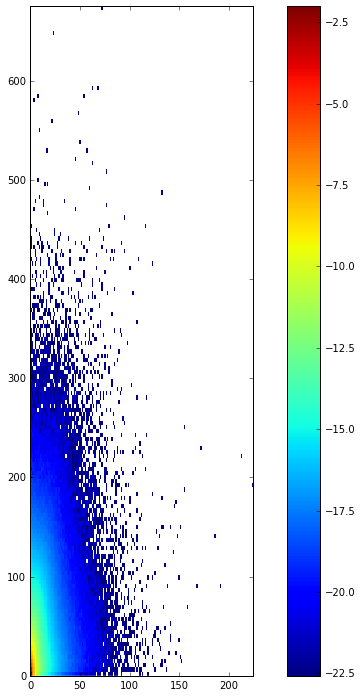

In [17]:
fig = plt.figure(figsize=(12,12))

logH = np.log(H)
cax = plt.imshow(logH,interpolation='none',extent=(s2Min/avg,s2Max/avg,w2Min/avg,w2Max/avg),origin='lower')
cbar = fig.colorbar(cax)

In [18]:
hist[:,0] = np.log(s2f[:]/avg)/np.log(10)
hist[:,1] = np.log(w2f[:]/avg)/np.log(10)

In [19]:
ls2Min = np.min(hist[:,0])
ls2Max = np.max(hist[:,0])
lw2Min = np.min(hist[:,1])
lw2Max = np.max(hist[:,1])

In [20]:
print(ls2Min,ls2Max)
print(lw2Min,lw2Max)
print("log(S2) min,max: ",ls2Min,ls2Max,"; log(w2) min,max: ",lw2Min,lw2Max)

-4.39958429337 2.35220098495
-6.84460306168 2.82941174507
log(S2) min,max:  -4.39958429337 2.35220098495 ; log(w2) min,max:  -6.84460306168 2.82941174507


In [21]:
ls2binNum = 80
de = (ls2Max-ls2Min)/(ls2binNum)
lw2binNum = int((lw2Max-lw2Min)/(de))+1

print(ls2binNum,lw2binNum)

num  = max(ls2binNum,lw2binNum)
bmin = min(ls2Min,lw2Min)
bmax = max(ls2Max,lw2Max)

80 115


In [22]:
H, edges = np.histogramdd(hist, bins=(num,num), range=((bmin,bmax),(bmin,bmax)), normed=True)

/home/idies/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


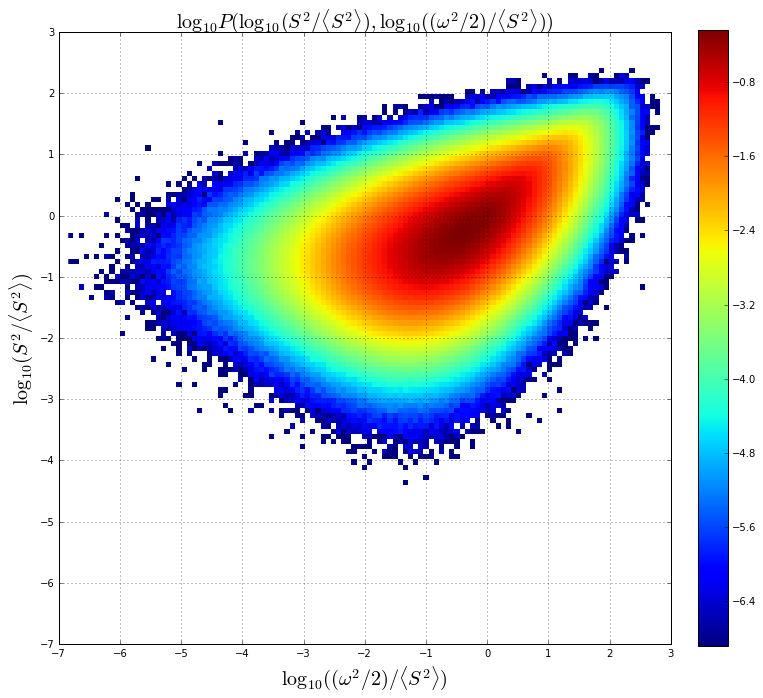

In [25]:
fig = plt.figure(figsize=(12,12))
plt.yticks(ticks)
logH = np.log(H)/np.log(10)

plt.title(r'$\log_{10} P(\log_{10}{( S^2/\langle S^2\rangle)},\log_{10}{( (\omega^2/2)/\langle S^2\rangle)})$',size=20)
plt.ylabel(r'$\log_{10}{( S^2/\langle S^2\rangle)}$',size=20)
plt.xlabel(r'$\log_{10}{( (\omega^2/2)/\langle S^2\rangle)}$',size=20)

#cax = plt.imshow(logH,interpolation='none',extent=(ls2Min,ls2Max,lw2Min,lw2Max),origin='lower')
cax = plt.imshow(logH,interpolation='none',extent=(bmin,bmax,bmin,bmax),origin='lower', aspect='equal')

ticks = [-7,-6,-5,-4,-3,-2,-1,0,1,2,3]
plt.xticks(ticks)
plt.yticks(ticks)

plt.grid()
cbar = fig.colorbar(cax,fraction=0.046, pad=0.04)#,ticks=ticks)
plt.savefig('strain-enstr-jpdf-log.pdf', format='pdf')
#plt.savefig('strain-enstr-jpdf-log.eps', format='eps',dpi=2000)

In [29]:
dw2 = np.logspace(-7, 3, num=250, endpoint=True, base=np.e)
ds2 = dw2[:]

/home/idies/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


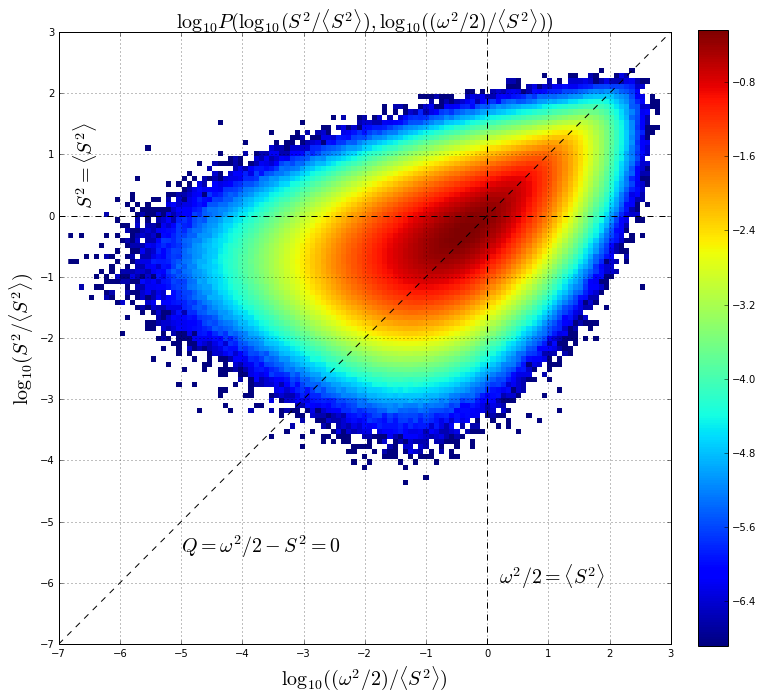

In [101]:
fig = plt.figure(figsize=(12,12))
plt.yticks(ticks)
logH = np.log(H)/np.log(10)

plt.title(r'$\log_{10} P(\log_{10}{( S^2/\langle S^2\rangle)},\log_{10}{( (\omega^2/2)/\langle S^2\rangle)})$',size=20)
plt.ylabel(r'$\log_{10}{( S^2/\langle S^2\rangle)}$',size=20)
plt.xlabel(r'$\log_{10}{( (\omega^2/2)/\langle S^2\rangle)}$',size=20)

#cax = plt.imshow(logH,interpolation='none',extent=(ls2Min,ls2Max,lw2Min,lw2Max),origin='lower')
cax = plt.imshow(logH,interpolation='none',extent=(bmin,bmax,bmin,bmax),origin='lower', aspect='equal')

ticks = [-7,-6,-5,-4,-3,-2,-1,0,1,2,3]
plt.xticks(ticks)
plt.yticks(ticks)

plt.grid()
cbar = fig.colorbar(cax,fraction=0.046, pad=0.04)#,ticks=ticks)
#plt.scatter(np.log(dw2),np.log(ds2))
#########################################
dw2 = np.logspace(-7, 3, num=250, endpoint=True, base=np.e)
ds2 = dw2[:]
plt.plot(np.log(dw2),np.log(ds2),'k--')
#########################################
dw2 = np.logspace(-7, 3, num=250, endpoint=True, base=np.e)
ds2 = np.logspace(0, 0, num=250, endpoint=True, base=np.e)
#ds2[:] = 1
plt.plot(np.log(dw2),np.log(ds2),'k--')
#########################################
dw2 = np.logspace(0, 0, num=250, endpoint=True, base=np.e)
ds2 = np.logspace(-7, 3, num=250, endpoint=True, base=np.e)
#ds2[:] = 1
plt.plot(np.log(dw2),np.log(ds2),'k--')
#########################################
plt.text(0.2, -6, r'$\omega^2/2=\langle S^2\rangle$', fontsize=20)
plt.text(-6.8, 1.2, r'$S^2=\langle S^2\rangle$', fontsize=20,rotation=90)
plt.text(-5, -5.5, r'$Q = \omega^2/2-S^2 = 0$', fontsize=20)
#########################################
plt.savefig('strain-enstr-jpdf-log.pdf', format='pdf')
#plt.savefig('strain-enstr-jpdf-log.eps', format='eps',dpi=2000)

/home/idies/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


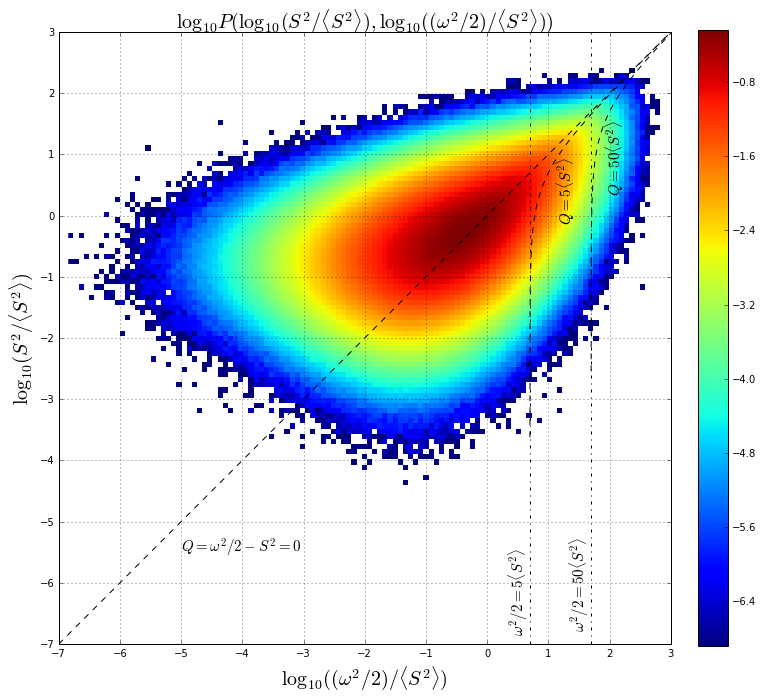

In [121]:
fig = plt.figure(figsize=(12,12))
plt.yticks(ticks)
logH = np.log(H)/np.log(10)

plt.title(r'$\log_{10} P(\log_{10}{( S^2/\langle S^2\rangle)},\log_{10}{( (\omega^2/2)/\langle S^2\rangle)})$',size=20)
plt.ylabel(r'$\log_{10}{( S^2/\langle S^2\rangle)}$',size=20)
plt.xlabel(r'$\log_{10}{( (\omega^2/2)/\langle S^2\rangle)}$',size=20)

#cax = plt.imshow(logH,interpolation='none',extent=(ls2Min,ls2Max,lw2Min,lw2Max),origin='lower')
cax = plt.imshow(logH,interpolation='none',extent=(bmin,bmax,bmin,bmax),origin='lower', aspect='equal')

ticks = [-7,-6,-5,-4,-3,-2,-1,0,1,2,3]
plt.xticks(ticks)
plt.yticks(ticks)

plt.grid()
cbar = fig.colorbar(cax,fraction=0.046, pad=0.04)#,ticks=ticks)
#plt.scatter(np.log(dw2),np.log(ds2))
#########################################
dw2 = np.logspace(-7, 3, num=250000, endpoint=True, base=10.)
ds2 = dw2[:]-0
plt.plot(np.log(dw2[ds2>0.])/np.log(10),np.log(ds2[ds2>0.])/np.log(10),'k--')
#########################################
dw2 = np.logspace(-7, 3, num=250000, endpoint=True, base=10.)
ds2 = dw2[:]-5
plt.plot(np.log(dw2[ds2>0.])/np.log(10),np.log(ds2[ds2>0.])/np.log(10),'k--')
#########################################
dw2 = np.logspace(-7, 3, num=250000, endpoint=True, base=10.)
ds2 = dw2[:]-50
plt.plot(np.log(dw2[ds2>0.])/np.log(10),np.log(ds2[ds2>0.])/np.log(10),'k--')
#########################################
dw2 = np.logspace(np.log(5)/np.log(10), np.log(5)/np.log(10), num=250, endpoint=True, base=np.e)
ds2 = np.logspace(-7, 3, num=250, endpoint=True, base=np.e)
#ds2[:] = 1
plt.plot(np.log(dw2),np.log(ds2),'k-.')
#########################################
dw2 = np.logspace(np.log(50)/np.log(10), np.log(50)/np.log(10), num=250, endpoint=True, base=np.e)
ds2 = np.logspace(-7, 3, num=250, endpoint=True, base=np.e)
#ds2[:] = 1
plt.plot(np.log(dw2),np.log(ds2),'k-.')
#########################################
plt.text(-5, -5.5, r'$Q = \omega^2/2-S^2 = 0$', fontsize=15)
plt.text(0.3, -5.7, r'$\omega^2/2=5\langle S^2\rangle$', fontsize=15,rotation=90)
plt.text(1.3, -5.5, r'$\omega^2/2=50\langle S^2\rangle$', fontsize=15,rotation=90)
plt.text(1.1, 0.7, r'$Q=5\langle S^2\rangle$', fontsize=15,rotation=90)
plt.text(1.9, 1.3, r'$Q=50\langle S^2\rangle$', fontsize=15,rotation=90)
#########################################
plt.savefig('strain-enstr-jpdf-log-2.pdf', format='pdf')
#plt.savefig('strain-enstr-jpdf-log.eps', format='eps',dpi=2000)